In [5]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision import transforms
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib inline
from callback import data_processing

import itertools

# 正規化
from sklearn.preprocessing import MinMaxScaler
import math

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data Processing

In [6]:
def mk_dataframe(path):
    df = pd.read_table(path, sep=" ", header=None)
    df = df.drop(columns=0, axis=1)
    df = df.drop(columns=df.shape[1], axis=1)
    return df

df = mk_dataframe("230728/pos-3.dat")

In [7]:
df_ = df.values

In [8]:
df_.shape

(36000, 60)

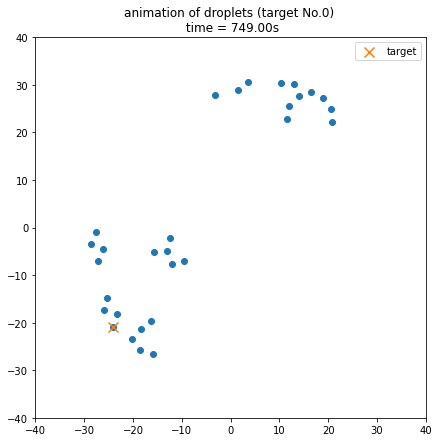

In [15]:
fig = plt.figure(figsize=(7,7))

start_time = 5000
target = 0
def plot(time):
    plt.cla()                   # 前のグラフを削除
    
    time *= 10
    plt.scatter(df_[time+start_time,::2], df_[time+start_time,1::2])
    plt.scatter(df_[time+start_time,target*2], df_[time+start_time, target*2 + 1], marker="x", s=100, label = "target")
    plt.title("animation of droplets (target No.{}) \n time = {:.2f}s".format(target, (time+start_time) * 0.1))
    plt.legend()
    plt.xlim(-40,40)
    plt.ylim(-40,40)

    return fig

ani = animation.FuncAnimation(fig, plot, frames=250, interval=100)

from IPython.display import HTML
HTML(ani.to_html5_video())

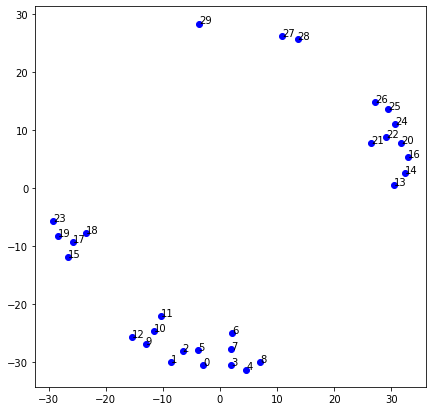

In [10]:
plt.figure(figsize=(7,7))
for i in range(30):
    plt.scatter(df_[2500,i*2], df_[2500,i*2+1], color="b")
    plt.text(df_[2500,i*2], df_[2500,i*2+1], i)

In [16]:
df_to_use = df_[:7500]

In [30]:
data = data_processing.DataProcessing(df_to_use, n_nearest_neighbors=5, target_no=0, split_angle=90)

In [31]:
labels, data_d_and_angle = data()

In [32]:
labels

array([3., 1., 0., ..., 2., 1., 0.])

### Labels and their size

In [33]:
np.unique(labels, return_counts=True)

(array([0., 1., 2., 3., 4.]), array([1535, 2225, 1953, 1504,  281]))

#### Normalize data

In [42]:
data_d_and_angle[:, 1::4] /= 360

In [46]:
data_d_and_angle[0]

array([ 2.75071688e+00,  3.41652593e-01,  2.04618994e-02, -2.00056306e-02,
        4.19056616e+00,  4.55034270e-01,  1.29299843e-02,  1.69466713e-03,
        6.80525814e+00,  4.80098708e-01,  3.12215376e-02, -7.48073161e-03,
        7.60791128e+00,  5.05010216e-02,  0.00000000e+00,  0.00000000e+00,
        1.01325159e+01,  3.46189564e-01, -4.59560440e-03, -2.77417582e-03])

## Model Define